# AirStat Data on Airports

import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import autoreload
import missingno as msno
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.impute import SimpleImputer

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 1)
pd.set_option("display.max_rows", 1000)

sb.set_style("darkgrid")
sb.set()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Load and Analyze Data 

In [2]:
airports = pd.read_csv(r"D:\Open Classroom\Datasets\AirStats Data on airports around the world\airports.csv")
countries = pd.read_csv(r"D:\Open Classroom\Datasets\AirStats Data on airports around the world\countries.csv")
regions = pd.read_csv(r"D:\Open Classroom\Datasets\AirStats Data on airports around the world\regions.csv")

In [3]:
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [4]:
countries.head()

,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emirates,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,NaN
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN


In [5]:
regions.head()

,id,code,local_code,name,continent,iso_country,wikipedia_link,keywords
0,302811,AD-02,02,Canillo Parish,EU,AD,https://en.wikipedia.org/wiki/Canillo,NaN
1,302812,AD-03,03,Encamp Parish,EU,AD,https://en.wikipedia.org/wiki/Encamp,NaN
2,302813,AD-04,04,La Massana Parish,EU,AD,https://en.wikipedia.org/wiki/La_Massana,NaN
3,302814,AD-05,05,Ordino Parish,EU,AD,https://en.wikipedia.org/wiki/Ordino,NaN
4,302815,AD-06,06,Sant Julià de Lòria Parish,EU,AD,https://en.wikipedia.org/wiki/Sant_Julià_de_Lòria,NaN


#### Statistical Analysis

In [6]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67312 entries, 0 to 67311
Data columns (total 18 columns):
id                   67312 non-null int64
ident                67311 non-null object
type                 67312 non-null object
name                 67312 non-null object
latitude_deg         67312 non-null float64
longitude_deg        67312 non-null float64
elevation_ft         54335 non-null float64
continent            34320 non-null object
iso_country          67055 non-null object
iso_region           67312 non-null object
municipality         61781 non-null object
scheduled_service    67312 non-null object
gps_code             42618 non-null object
iata_code            9244 non-null object
local_code           32055 non-null object
home_link            3300 non-null object
wikipedia_link       10370 non-null object
keywords             12367 non-null object
dtypes: float64(3), int64(1), object(14)
memory usage: 9.2+ MB


In [7]:
airports.describe().round()

,id,latitude_deg,longitude_deg,elevation_ft
count,67312.0,67312.0,67312.0,54335.0
mean,130355.0,26.0,-31.0,1269.0
std,147217.0,26.0,84.0,1625.0
min,2.0,-90.0,-180.0,-1266.0
25%,16963.0,11.0,-94.0,208.0
50%,36280.0,35.0,-71.0,725.0
75%,322275.0,43.0,19.0,1558.0
max,347611.0,83.0,180.0,22000.0


In [8]:
airports.shape

(67312, 18)

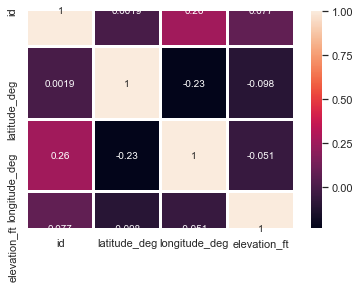

In [9]:
sb.heatmap(airports.corr(), annot = True, linewidths = 2)

#### Data Cleaning and Manipulation

In [10]:
airports.drop(columns = ["ident", "latitude_deg", "longitude_deg", "iso_country", "iso_region", "gps_code", "iata_code", "local_code", "home_link", "wikipedia_link", "keywords"], inplace = True)
airports.head()

,id,type,name,elevation_ft,continent,municipality,scheduled_service
0,6523,heliport,Total Rf Heliport,11.0,NaN,Bensalem,no
1,323361,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,no
2,6524,small_airport,Lowell Field,450.0,NaN,Anchor Point,no
3,6525,small_airport,Epps Airpark,820.0,NaN,Harvest,no
4,6526,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,no


In [11]:
airports.id.unique()

array([  6523, 323361,   6524, ..., 346788, 342102, 313629], dtype=int64)

['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

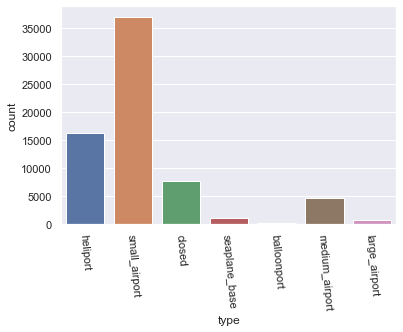

In [12]:
print(airports.type.unique())
sb.countplot(airports["type"])
plt.xticks(rotation = -85)

In [13]:
airports.name.unique()

array(['Total Rf Heliport', 'Aero B Ranch Airport', 'Lowell Field', ...,
       'Fainting Goat Airport', 'Scandium City Heliport',
       'Satsuma Iōjima Airport'], dtype=object)

In [14]:
airports.elevation_ft.unique()

array([1.1000e+01, 3.4350e+03, 4.5000e+02, ..., 9.6750e+03, 2.9160e+03,
       1.2816e+04])

[nan 'OC' 'AF' 'AN' 'EU' 'AS' 'SA']
SA    9415
EU    9320
AS    8735
AF    3634
OC    3172
AN    44  
Name: continent, dtype: int64
Total null values in this series,  32992


Text(0.5, 1.0, 'Airport Population based on Continent')

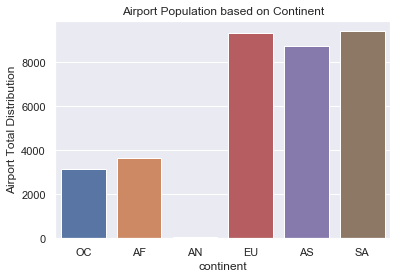

In [15]:
print(airports.continent.unique())
print(airports.continent.value_counts())
print("Total null values in this series, ", airports.continent.isnull().sum())
sb.countplot(airports["continent"])
plt.ylabel("Airport Total Distribution")
plt.title("Airport Population based on Continent")

In [16]:
#simp_imputer = SimpleImputer(strategy = "most_frequent")
#simp_imputer.fit_transform(airports["continent"])
#airports.head()

In [17]:
total_count = airports.continent.count().sum()#.mean()
total_count
continent_count = airports.continent.value_counts().sum()
continent_mean = continent_count / 6
continent_mean

5720.0

In [18]:
airports.scheduled_service.unique()

array(['no', 'yes'], dtype=object)

In [19]:
countries.head()

,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emirates,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,NaN
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN


In [20]:
countries.drop(columns = ["continent", "wikipedia_link", "keywords"], inplace = True)
countries = countries.rename(columns={"name":"c_name"})
countries.head()

,id,code,c_name
0,302672,AD,Andorra
1,302618,AE,United Arab Emirates
2,302619,AF,Afghanistan
3,302722,AG,Antigua and Barbuda
4,302723,AI,Anguilla


In [21]:
regions.head()

,id,code,local_code,name,continent,iso_country,wikipedia_link,keywords
0,302811,AD-02,02,Canillo Parish,EU,AD,https://en.wikipedia.org/wiki/Canillo,NaN
1,302812,AD-03,03,Encamp Parish,EU,AD,https://en.wikipedia.org/wiki/Encamp,NaN
2,302813,AD-04,04,La Massana Parish,EU,AD,https://en.wikipedia.org/wiki/La_Massana,NaN
3,302814,AD-05,05,Ordino Parish,EU,AD,https://en.wikipedia.org/wiki/Ordino,NaN
4,302815,AD-06,06,Sant Julià de Lòria Parish,EU,AD,https://en.wikipedia.org/wiki/Sant_Julià_de_Lòria,NaN


In [22]:
regions.drop(columns = ["code", "local_code", "continent", "iso_country", 'wikipedia_link', "keywords"], inplace = True)
regions.head()

,id,name
0,302811,Canillo Parish
1,302812,Encamp Parish
2,302813,La Massana Parish
3,302814,Ordino Parish
4,302815,Sant Julià de Lòria Parish


In [23]:
airports.merge(countries, left_index = True, right_on = "id")
airports.head()

,id,type,name,elevation_ft,continent,municipality,scheduled_service
0,6523,heliport,Total Rf Heliport,11.0,NaN,Bensalem,no
1,323361,small_airport,Aero B Ranch Airport,3435.0,NaN,Leoti,no
2,6524,small_airport,Lowell Field,450.0,NaN,Anchor Point,no
3,6525,small_airport,Epps Airpark,820.0,NaN,Harvest,no
4,6526,closed,Newport Hospital & Clinic Heliport,237.0,NaN,Newport,no
